# Лабораторная работа № 5. Часть 2. Модель случайного леса

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [83]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
train, test = train_test_split(df, test_size=0.2)

feats = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X_train = train[feats]
Y_train = train[['Outcome']]

X_test = test[feats]
Y_test = test[['Outcome']]

Исследование качества модели от глубины

In [85]:
depths = range(1, 26)
f1_scores = []

for depth in depths:
    model = RandomForestClassifier(max_depth=depth)
    model.fit(X_train, Y_train.values[:, 0])
    Y_pred = model.predict(X_test)
    
    f1 = metrics.f1_score(Y_test, Y_pred)
    f1_scores.append(f1)

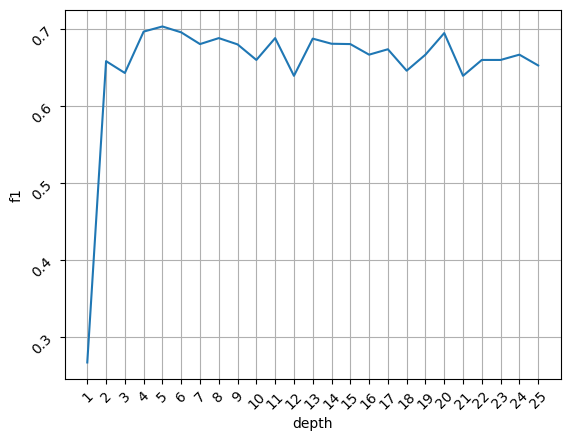

In [86]:
ax = plt.subplot()
ax.plot(depths, f1_scores)
ax.set_xlabel("depth")
ax.set_xticks(depths)
ax.tick_params(labelrotation=45)
ax.grid(visible=True)
ax.set_ylabel("f1")
plt.show()

Исследование качества модели от количества признаков

In [87]:
featnums = range(1, len(feats)+1)
f1_scores = []

for featnum in featnums:
    model = RandomForestClassifier(max_features=featnum)
    model.fit(X_train, Y_train.values[:, 0])
    Y_pred = model.predict(X_test)
    
    f1 = metrics.f1_score(Y_test, Y_pred)
    f1_scores.append(f1)

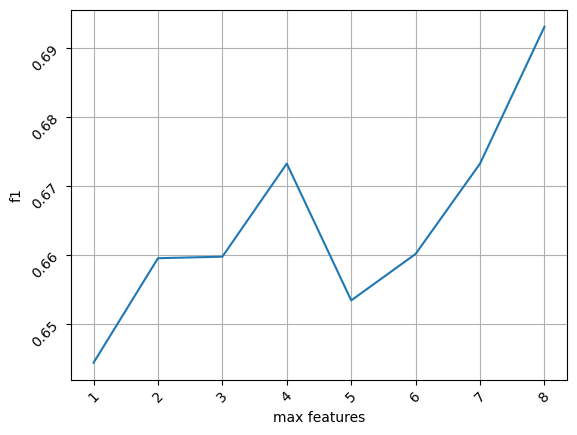

In [88]:
ax = plt.subplot()
ax.plot(featnums, f1_scores)
ax.set_xlabel("max features")
ax.set_xticks(featnums)
ax.tick_params(labelrotation=45)
ax.grid(visible=True)
ax.set_ylabel("f1")
plt.show()

Исследование качества модели от числа деревьев

In [89]:
trees = range(100, 121)
f1_scores = []
fit_times = []

for tree in trees:
    model = RandomForestClassifier(n_estimators=tree)

    start = time.time()
    
    model.fit(X_train, Y_train.values[:, 0])

    fit_times.append(time.time()-start)
    
    Y_pred = model.predict(X_test)
    
    f1 = metrics.f1_score(Y_test, Y_pred)
    f1_scores.append(f1)

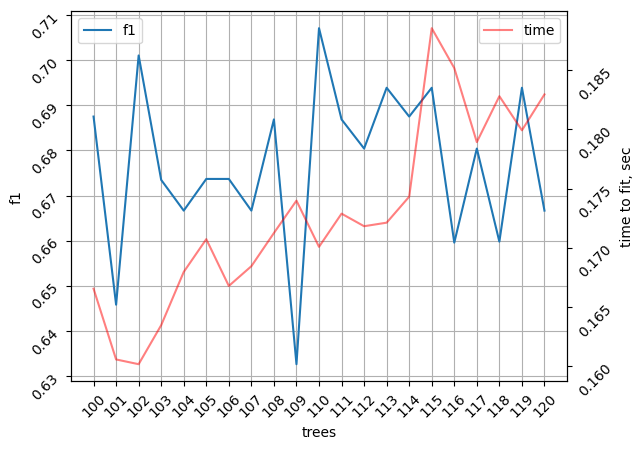

In [91]:
ax = plt.subplot()
ax2 = ax.twinx()

ax.plot(trees, f1_scores, label="f1")
ax2.plot(trees, fit_times, color="r", label="time", alpha=0.5)

ax.set_xlabel("trees")
ax.set_xticks(trees)
ax.tick_params(labelrotation=45)
ax.grid(visible=True)
ax.set_ylabel("f1")
ax2.set_ylabel("time to fit, sec")
ax2.tick_params(labelrotation=45)

ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

Теперь применяем XGBoost, значения подбирались вручную

In [128]:
model_boost = XGBClassifier(n_estimators=8, max_depth=10, reg_alpha=0.5, reg_lambda=0.5)

model_boost.fit(X_train, Y_train)

Y_pred = model_boost.predict(X_test)

In [129]:
metrics.f1_score(Y_test, Y_pred)

0.66

Судя по метрике, XGBoost показывает себя хуже, чем метод случайного леса, однако это вполне может быть из-за выбранных мною параметров. Вероятно, при более тонкой настройке можно было бы добиться результата лучше